In [1]:
from core import *
from utils import *
from diagnostics import *
from fields import *
from constants import *
from distributions import *

from scipy import constants as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit

Load IGRF coefficients ...


In [2]:
e_field = zero_field() # uniform_field(1e-4, np.array([0., 1., 0.]))
b_field = t89(7)
solve   = solver(relativistic_boris(e_field, b_field))

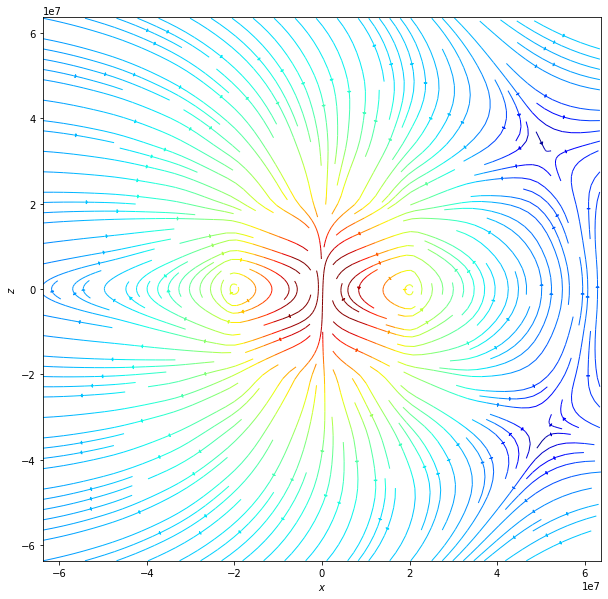

In [8]:
plot_field(b_field, 'y', 10, [-10 * Re, 10 * Re], [-10 * Re, 10 * Re])

In [4]:
import scipy.constants as sp

rr = field_line(b_field, np.array([-10 * Re, 0, 0]), 1e-6)
adp = np.zeros(len(rr))
kappa = np.zeros(len(rr))

K = 1e6

def gamma_from_E(K, m):
    return 1 + K / (m * sp.c**2)

def v_rel(g):
    return (sp.c / g) * sqrt(g**2 - 1)

for i, r in enumerate(rr):
    b = b_field(r)
    
    v = v_rel(gamma_from_E(eV_to_J(K), sp.m_e))
    v_vec = np.array([v, 0, 0])
    rho_0 = gamma(v_vec) * sp.m_e * np.linalg.norm(v) / (abs(-sp.e) * np.linalg.norm(b))
    
    R_c = flc(b_field, r)
    adp[i] = rho_0 / R_c
    kappa[i] = np.sqrt(R_c / rho_0)

In [5]:
b_vec, b_mag, b_rad_mag = b_along_path(b_field, rr)

In [6]:
r_mag = []

for r in rr:
    r_mag.append(np.linalg.norm(r))

In [7]:
np.amin(b_mag)

1.364447504757575e-08

In [13]:
np.abs(np.array(r_mag) - (Re + 100e3)).argmin()

127

In [14]:
np.linalg.norm(b_mag[127])

5.761551756657977e-05

In [21]:
r_mag[0] / Re

1.027749563347036

In [15]:
np.degrees(np.arcsin(sqrt(np.amin(b_mag) / np.linalg.norm(b_mag[127]))))

0.8817560687360285

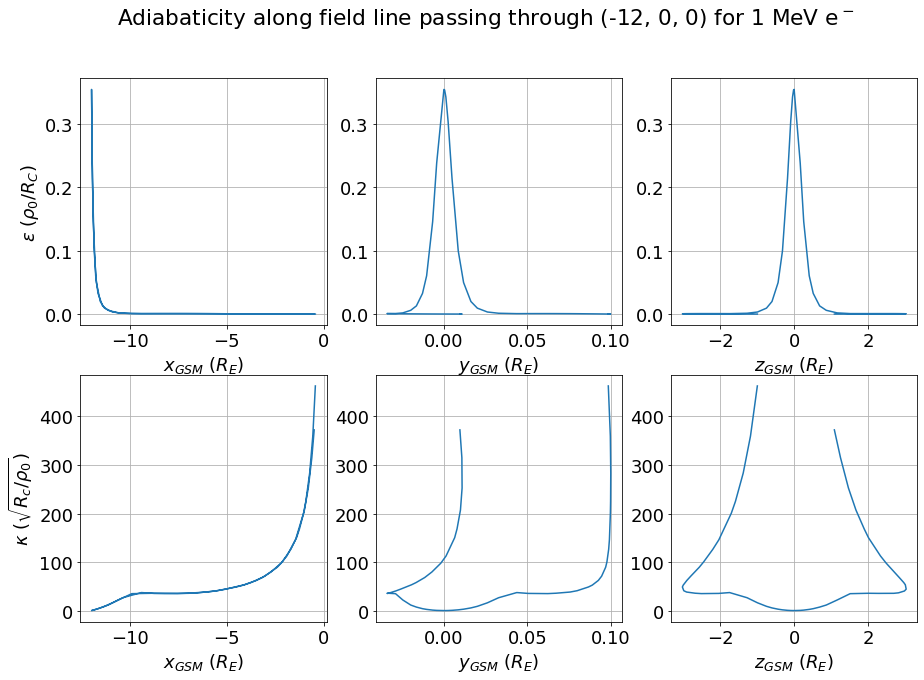

In [4]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.plot(rr[:, 0] / Re, adp)
plt.xlabel(r'$x_{GSM}$ ($R_E$)')
plt.ylabel(r'$\epsilon$ ($\rho_0/R_C$)')
plt.grid()

plt.subplot(232)
plt.plot(rr[:, 1] / Re, adp)
plt.xlabel(r'$y_{GSM}$ ($R_E$)')
plt.grid()

plt.subplot(233)
plt.plot(rr[:, 2] / Re, adp)
plt.xlabel(r'$z_{GSM}$ ($R_E$)')
plt.grid()

plt.subplot(234)
plt.plot(rr[:, 0] / Re, kappa)
plt.xlabel(r'$x_{GSM}$ ($R_E$)')
plt.ylabel(r'$\kappa$ ($\sqrt{R_c/\rho_0}$)')
plt.grid()

plt.subplot(235)
plt.plot(rr[:, 1] / Re, kappa)
plt.xlabel(r'$y_{GSM}$ ($R_E$)')
plt.grid()

plt.subplot(236)
plt.plot(rr[:, 2] / Re, kappa)
plt.xlabel(r'$z_{GSM}$ ($R_E$)')
plt.grid()

fig.suptitle('Adiabaticity along field line passing through (-12, 0, 0) for 1 MeV e$^-$')

plt.show()